# Árboles de decisión

El objetivo de este notebook es entender con más detalle cómo funciona un árbol de decisión. Para ello, seguiremos trabajando con el dataset de Titanic y luego con el Iris Dataset. El notebook está dividido en cuatro partes. 

1. Construcción de un árbol de decisión *a mano*.
2. Cálculo de Impureza y Ganancia Gini
3. Árboles de Decisión en Scikit-Learn + *train/test split*
4. Iris Dataset.

## 1. Construcción de un árbol de decisión *a mano*

**NOTA**: LEER HASTA EL FINAL ANTES DE MODIFICAR EL CÓDIGO.

En primer lugar, vamos a definir algunas funciones.

1. La función `accuracy`, dada las etiquetas que ustedes predigan y las etiquetas reales, calcula la medida de performance, en este caso, la exactitud. **No la tienen que modificar**.

In [1]:
def accuracy(y_predicted, y_real):
    return sum([y_i == y_j for (y_i, y_j) in zip(y_predicted, y_real)])/len(y_real)

2. La función `predict_instance`, dada una instancia x con sus atributos, predice si sobrevivió o no. **Es la única función que tendrán que modificar**.

In [2]:
def predict_instance(x):
    '''
    Modificar las siguientes líneas de codigo. 
    Este será su algoritmo algoritmo para predecir si sobrevivirá o no por instancia.
    La variable prediction debe contener la etiqueta 0 o 1 
    
    Algunas opciones son: predecir que nadie sobrevivio, que todos sobrevivieron,
    predecir al azar, y usar lo aprendido cuando exploramos el dataset de Titanic
    '''
    prediction = 0 # cambiar
    
    #### UNA POSIBLE FORMA DE EMPEZAR:
    if x.Sex == 'female':
        prediction = 1
    elif x.Pclass == 1:
        prediction = 1
    ## FIN DE COMPLETAR

    return prediction

3. Por último, la función `predict` toma todo las instancias X y, usando la función que definieron antes, predice para cada una de ellas si sobrevivió o no. **No la tienen que modificar**.

In [3]:
def predict(X):
    y_predicted = []
    for x in X.itertuples(): 
        y_i = predict_instance(x) 
        y_predicted.append(y_i)
    return y_predicted

**Consigna**

* Cargar el dataset de Titanic y separar en una variable `X` los atributos que usaremos para predecir, y en una variable `y` la etiqueta que queremos predecir. En este caso, si sobrevivió o no.

In [4]:
import pandas as pd

df = pd.read_csv('DS_Clase_05_titanic.csv')
X = df.drop(['Survived'], axis=1)
y = df.Survived
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


* Usar los datos `X` para predecir si los pasajeros sobrevivieron o no.

In [5]:
y_pred = predict(X)
print(y_pred)

[0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 

* Calcular la medida de performance entre las etiquetas reales `y` y las etiquetas predichas `y_pred`

In [6]:
print("Accuracy final: ", round(accuracy(y_pred, y), 3))

Accuracy final:  0.751


**Ejercicio**: modificar `predict_instance` de forma tal de mejorar el resultado recién obtenido.

**Para pensar:** las performances asociadas a predecir todos `0` (nadie sobrevivió), todos `1` (todos sobrevivieron) y predecir al azar son muy importantes para evaluar nuestro trabajo. ¿Por qué?

## 2. Cálculo de Impureza y Ganancia Gini

Ahora vamos a calcular cuán buena es la *pregunta* del género y clase para separar las muestras usando la impureza Gini. Para ello:

**Ejercicio:** calcular la impureza inicial del dataset. Ayuda: recordar que en la variable `y` ya separaron las etiquetas. Si es un objeto de Pandas, tal vez la función `value_counts()` puede ser útil. 

In [7]:
muestras_neg, muestras_pos = y.value_counts()
N = y.size
gini_inicial = 1 - (muestras_neg/N)**2 - (muestras_pos/N)**2

In [8]:
print(gini_inicial)

0.4730129578614428


**Ejercicio:** calcular la impureza Gini luego de separar por el género. Recuerden que tienen que calcular la impureza en dos hojas - una correspondiente a género masculino y otras femenino - y luego hacer un promedio ponderado. Para eso, puede ser conveniente crear una máscara y reciclar código anterior.

In [9]:
mascara = df.Sex == 'female'
y_female = y[mascara]
y_male = y[-mascara]

In [10]:
muestras_neg, muestras_pos = y_female.value_counts()
N = y_female.size
gini_female = 1 - (muestras_neg/N)**2 - (muestras_pos/N)**2
print(gini_female)

0.3828350034484158


In [11]:
muestras_neg, muestras_pos = y_male.value_counts()
N = y_male.size
gini_male = 1 - (muestras_neg/N)**2 - (muestras_pos/N)**2
print(gini_male)

0.3064437162277842


In [12]:
print('Impureza Gini al separar por Genero:',(y_female.sum()/y.sum()*gini_female + y_male.sum()/y.sum()*gini_male))

Impureza Gini al separar por Genero: 0.35848807272605077


**Ejercicio:** calcular la impureza Gini luego de separar por clase. Recuerden que tienen que calcular la impureza en tres hojas y luego hacer un promedio ponderado. Para eso, puede ser conveniente crear tres máscaras y reciclar código anterior.

In [13]:
mascara = df.Pclass == 1
y_1 = y[mascara]

In [14]:
muestras_neg, muestras_pos = COMPLETAR
N = COMPLETAR
gini_1 = COMPLETAR
print(gini_1)

NameError: name 'COMPLETAR' is not defined

In [ ]:
mascara = COMPLETAR
y_2 = COMPLETAR

In [ ]:
COMPLETAR
print(gini_2)

In [ ]:
mascara =COMPLETAR
COMPLETAR

In [ ]:
COMPLETAR
COMPLETAR
COMPLETAR
print(gini_3)

In [ ]:
print('Impureza Gini al separar por clase:', COMPLETAR)

**¿Cuál tiene una mayor ganancia Gini?¿Concuerda con lo visto hasta ahora?**

**Para pensar:** ¿cómo modificarían el código para calcular la ganancia Gini al separar por edad? Por ejemplo, al separar por mayor de 12 años y menor de 12 años.

## 3. Árboles de Decisión en Scikit-Learn + *train/test split*

Nuevamente, vamos a trabajar con el dataset del Titanic. La consigna consiste en entrenar los mismos modelos de la clase 15 (en el sentido de usar el mismo preprocesamiento y los mismos atributos), pero separando los conjuntos de Train y Test. Además, evaluar los modelos en esos conjuntos. Entonces: reciclar el código del Notebook de la clase anterior y agregar un `train_test_split`, predecir sobre `X_train` y `X_test` y evaluar el desempeño de los modelos sobre esos conjuntos. Dejamos el *esqueleto* de algunas celdas que les pueden servir. 

Una vez que obtengan los desempeños sobre cada set y modelo, modificar el parámetro `max_depth` del `DecisionTreeClassifier` y volver a entrenar y evaluar. Prestar atención a las diferencias de desempeño en cada conjunto. ¿Qué está ocurriendo?

In [73]:
df = pd.read_csv('DS_Clase_05_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
df.isna().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [75]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df.drop(['Ticket','Fare','Cabin','Embarked'], axis=1, inplace=True)
#df.dropna(subset=['Age'], inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0


In [76]:
from sklearn.impute import SimpleImputer
import numpy as np

imp_mean = SimpleImputer(strategy='mean', missing_values=np.nan)
df[['Age']] = imp_mean.fit_transform(df[['Age']])

In [77]:
df.isna().mean()*100

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
dtype: float64

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

tree = DecisionTreeClassifier(max_depth=5)

X = df[['Pclass', 'Sex','Age']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [84]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [85]:
tree.classes_

array([0, 1], dtype=int64)

In [86]:
# Visualize Decision Tree
from sklearn.tree import export_graphviz

# Creates dot file named tree.dot
export_graphviz(
            tree,
            out_file =  "myTreeName2.dot",
            feature_names = list(X.columns),
            class_names = str(tree.classes_),
            filled = True,
            rounded = True)

In [87]:
from sklearn.metrics import accuracy_score

# Predecimos sobre nuestro set de entrenamieto
y_train_pred = tree.predict(X_train)

# Predecimos sobre nuestro set de test
y_test_pred = tree.predict(X_test)

# Comaparamos con las etiquetas reales
print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

Accuracy sobre conjunto de Train: 0.8342696629213483
Accuracy sobre conjunto de Test: 0.8044692737430168


## 4. Iris Dataset

Entrenar un `DecisionTreeClassifier` sobre el Iris Dataset. Dejamos algunas consignas de guía.

**Ejercicio**: importar los datos, descartar las columnas que no agreguen información y hacer una `pairplot`

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [136]:
iris = pd.read_csv('DS_Clase_04_iris.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [137]:
iris.isna().mean()

sepal.length    0.0
sepal.width     0.0
petal.length    0.0
petal.width     0.0
variety         0.0
dtype: float64

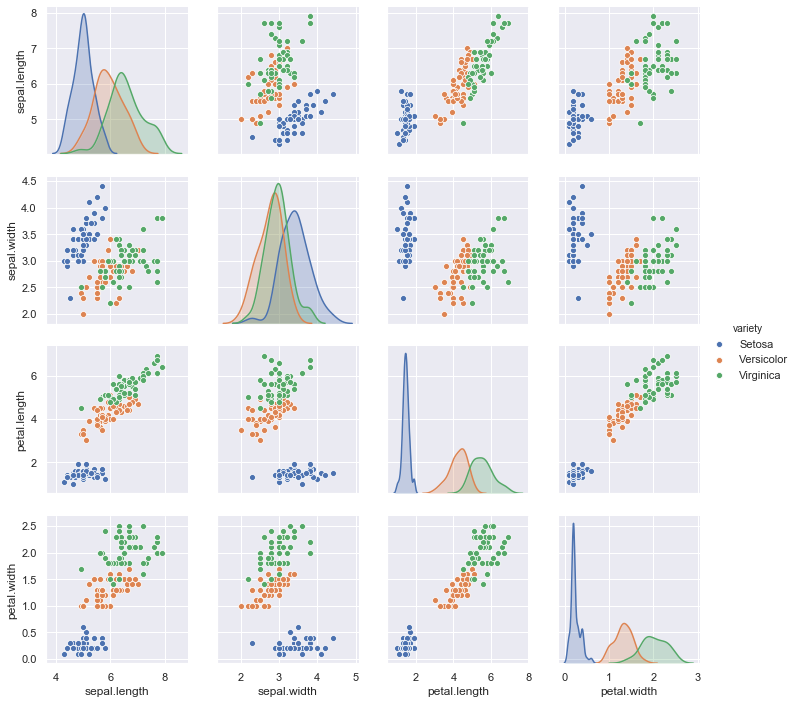

In [138]:
sns.pairplot(data=iris, hue='variety')

In [139]:
# No tocar este código
def plot_corre_heatmap(corr):
    '''
    Definimos una función para ayudarnos a graficar un heatmap de correlación
    '''
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

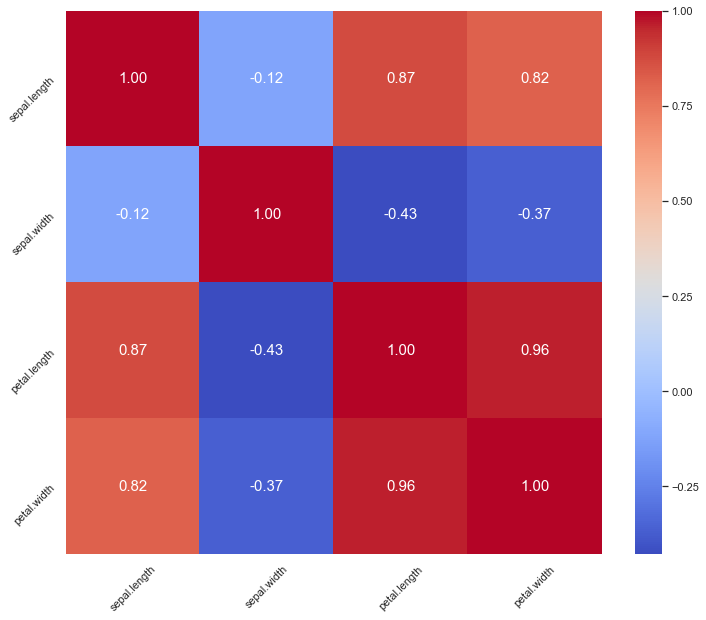

In [140]:
corr = iris.corr()
plot_corre_heatmap(corr)

**Para pensar**: ¿Son separables las especies?¿Cuáles serán más fáciles de separar?¿Con qué atributos?

**Ejercicio**: separar del dataframe los features y las etiquetas. Llamar `X` a los features e `y` a las etiquetas. Elegir qué features usar (pueden ser todos). Fijarse si es necesario transformar las etiquetas o si Scikit-Learn puede trabajar con ellas.

In [141]:
X = iris.drop(['variety'], axis=1)
y = iris['variety']

In [142]:
X.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [143]:
y.head()

0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
Name: variety, dtype: object

**Ejercicio**: separar en conjuntos de Train y Test

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Ejercicio**: importar un DecisionTreeClassifier de Scikit-Learn

In [145]:
from sklearn.tree import DecisionTreeClassifier

**Ejercicio**: crear un DecisionTreeClassifier con max_depth = 2.

In [146]:
tree = DecisionTreeClassifier(max_depth=2)

**Ejercicio**: entrenar el DecisionTreeClassifier que crearon.

In [147]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

**Ejercicio**: explorar algunas características del modelo entrenado.

In [148]:
print(tree.classes_)
print(tree.n_classes_)
print(tree.max_features_)
print(tree.feature_importances_)

['Setosa' 'Versicolor' 'Virginica']
3
4
[0.         0.         0.54328236 0.45671764]


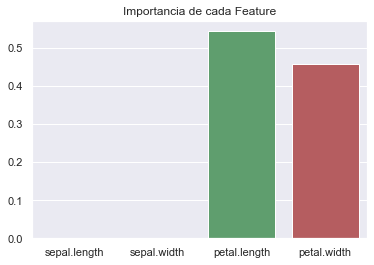

In [149]:
importances = tree.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

**Ejercicio**: predecir con el modelo las etiquetas en el conjunto de Train y de Test. ¿Cómo son las etiquetas?

In [150]:
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

**Ejercicio**: evaluar la performance del modelo.

In [151]:
from sklearn.metrics import accuracy_score

print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

Accuracy sobre conjunto de Train: 0.9583333333333334
Accuracy sobre conjunto de Test: 0.9666666666666667


**Ejercicio**: ¿Qué ocurre con el desempeño a medida que aumentan `max_depth`? Volver a correr todas las celdas, pero inicializando el `DecisionTreeClassifier` con valores más altos de max_depth.

**Ejercicio**: leer el código de la siguiente celda y tratar de entenderlo. Modificar `max_depth` y fijarse cómo se modifican las fronteras de decisión obtenidas.

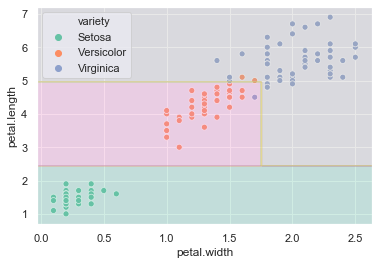

In [157]:
## Creamos el clasificador
clf = DecisionTreeClassifier(max_depth = 3)

# # Modificamos un poco los datos para poder graficar
y_train = y.map({'Setosa': 0,'Versicolor': 1, 'Virginica': 2})

# Entrenamos
clf.fit(X[['petal.width', 'petal.length']], y_train)

# Graficamos los datos y las fronteras creadas
plt.figure()
ax = sns.scatterplot(X['petal.width'], X['petal.length'], hue=y, palette='Set2')

xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

contours = ax.contourf(xx, yy, Z, alpha=0.3, cmap = 'Set2')
plt.show()